<a href="https://colab.research.google.com/github/junghyeonsu/Algorithm_Application/blob/master/DataScienceTool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

**Data Understanding의 목표?**

초기 데이터를 수집, 이해하고 데이터의 품질을 정의하고 <BR>
몇가지 가설을 구성하기 위한 데이터셋을 설정

**농구선수들의 점수 획득을 보고 어떤선수가 <BR>**
**가장 좋은 선수인지 어떻게 알수있을까?**

---

각 선수들의 10경기 득점 점수

선수1 = [15, 15, 17, 20, 21, 15, 12, 15, 18, 19]

선수2 = [30, 10, 15, 30, 15, 10, 30, 30, 15, 10]

선수3 = [20, 20, 20, 20, 10, 10, 10, 10, 20, 30]

**데이터를 설명할 수 있는 특징점이 필요하다!**
<br><br>
첫번째 아이디어 Data set의 중심값이 높은 선수

<br><br>
요기서 중심값은

1. 평균
  - 모든데이터를 전부 더한 다음 개수로 나눈 값
2. 중앙값
  - 데이터셋의 중앙에 위치한 값
3. 최빈값 
  - 제일 빈도수가 높은 값

을 의미한다. 

---
**각 선수별 중심값 구해보기**
***
선수1 = [15, 15, 17, 20, 21, 15, 12, 15, 18, 19]

* 선수1의 평균 
<br> 167 / 10 = 16.7 

* 선수1의 중앙값 (중앙값이 두개이므로 두개를 더한 다음 나눈다.)
<br> 21 + 15 / 2 = 18

* 선수1의 최빈값
<br> 15가 4번으로 제일 많이 나온다.
***
선수2 = [30, 10, 15, 30, 15, 10, 30, 30, 15, 10]

* 선수2의 평균 
<br> 195 / 10 = 19.5 

* 선수2의 중앙값 (중앙값이 두개이므로 두개를 더한 다음 나눈다.)
<br> 15 + 10 / 2 = 12.5

* 선수2의 최빈값
<br> 30이 4번으로 제일 많이 나온다.
***
선수3 = [20, 20, 20, 20, 10, 10, 10, 10, 20, 30]

* 선수3의 평균 
<br> 170 / 10 = 17.0 

* 선수3의 중앙값 (중앙값이 두개이므로 두개를 더한 다음 나눈다.)
<br> 10 + 10 / 2 = 10

* 선수3의 최빈값
<br> 20가 5번으로 제일 많이 나온다.

평균으로 봤을 때 : 선수2 > 선수3 > 선수1

중앙값으로 봤을 때 : 선수1 > 선수2 > 선수3

최빈값으로 봤을 때 : 선수2 > 선수3 > 선수1



# 중심값의 문제점은? 

그 데이터 내의 **중심적 경향**에 대해 설명만 하고있다.<br>
데이터 내의 **변화**에 대해서는 설명하지 못함.

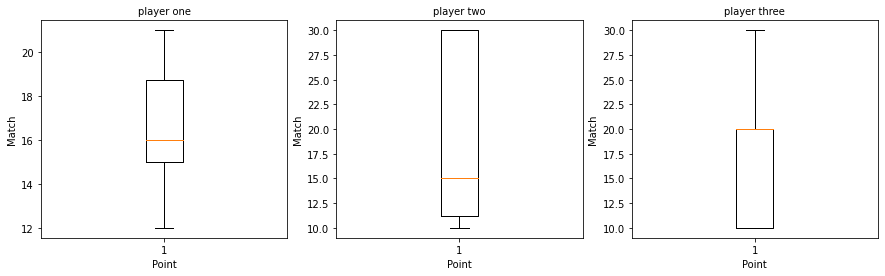

In [0]:
import matplotlib.pyplot as plt
import numpy as np

player_one = np.array([15, 15, 17, 20, 21, 15, 12, 15, 18, 19])
player_two = np.array( [30, 10, 15, 30, 15, 10, 30, 30, 15, 10])
player_three = np.array([20, 20, 20, 20, 10, 10, 10, 10, 20, 30])

plt.figure(figsize=(15,4))

oneChart = plt.subplot(131) # plot 위치
oneChart.set_title('player one', fontsize=10) # title
oneChart.boxplot(player_one) # x축, y축
oneChart.set_xlabel('Point')
oneChart.set_ylabel('Match')

twoChart = plt.subplot(132)
twoChart.set_title('player two', fontsize=10)
twoChart.boxplot(player_two)
twoChart.set_xlabel('Point')
twoChart.set_ylabel('Match')

threeChart = plt.subplot(133)
threeChart.set_title('player three', fontsize=10)
threeChart.boxplot(player_three)
threeChart.set_xlabel('Point')
threeChart.set_ylabel('Match')
plt.show()

---
# 그럼 변화를 설명할 수 있는 값은 무엇일까?

**변화값**

1. 분산
2. 표준편차

In [0]:
# player one의 분산
print(np.var(player_one))
# player two의 분산
print(np.var(player_two))
# player three의 분산
print(np.var(player_three))

# player one의 표준편차
print(np.std(player_one))
# player two의 표준편차
print(np.std(player_two))
# player three의 표준편차
print(np.std(player_three))

7.01
77.25
41.0
2.6476404589747453
8.789197915623474
6.4031242374328485


player two는 감정기복이 엄청 심한 선수 란것을 알 수 있다.<br>
player one은 감정기복이 별로 없는 것을 알 수 있다.

---
# player one의 11번째 경기의 득점은 어떻게 알수있을까? 

**확률**

확률은 과거에 득점한 득점점수 이력을 가지고 다음 경기의 득점을 예측한다! 

![image](https://user-images.githubusercontent.com/54893898/83613201-6e3bbf00-a5be-11ea-89ae-47691c6ce7eb.png)


**예측할 이벤트가 일어난 수 / 전체 경우의 수 = 확률**

어떤 경우에도 P(A)는 0과 1사이를 가진다.

---
# 확률 분포 구하기

**확률 분포란?**

각 event에 대해 확률의 분포를 표현한 것!

**확률 분포 구하는 방법은?**

* 사건에 대해서 기록을 한다.
* 전체 Event 대비 일어난 횟수를 구한다.
* 각 Event당 확률을 구한다.

**그러면 확률 분포를 구하려면 모든 사건에 대한 횟수를 다 알아야되나?**

아니다.

특정 Event는 확률 계산 방법을 **패턴화** 시킬 수 있다.

---
# 기하 분포 구하기

**기하 분포란?**

어떤 사람이 매주 로또를 사는데, 5주 동안 매주 빠지지 않고 로또를 샀다고 가정을 한다. 4주 동안 계속해서 당첨이 안되고 마지막으로 5주차에 당첨이 됐다.

이 사람은 총 5번 로또를 구매했고, 마지막 1등 당첨되기 전까지 4번의 실패를 거듭했다.

성공할 확률이 p, 실패할 확률이 q라면,
이 사람은 4번의 실패와 한번의 성공을 했으므로 다섯번째 시도에서 성공할 확률은 다음과 같다.

**p * q^4**

이 처럼 성공할 확률이 p인 Event에서
처음 성공할 때 까지의 시행횟수를 확률변수 X라고 하고, 이 확률변수를 **기하확률변수** 라고 부른다.

이 사람은 5번째에 1등 당첨이 됐으므로
이 사람의 **기하확률변수 X**는 5가 된다.

---

# Data Understanding이 중요한 이유?

이렇게 다양한 분석 기법으로 아직 일어나지 않은 Event에 대해서 예측을 하고 예방을 할 수 있다.

만약 우리가 농구선수를 스카우트를 해야하는데 우리가 봐야할 것은 그 선수의 전의 성적도 중요하지만, 우리가 스카우트 하고 난 다음의 성적이 중요한 요소이기 때문에 선수의 미래를 예측하기위해 과거를 분석후, 위에서 설명한 기법들을 통해 이 선수의 미래를 알 수 있는것이다.